<a href="https://colab.research.google.com/github/josedanielisidororeyes/Anal-tica-Descriptiva-y-Predictiva/blob/main/Pr%C3%A1ctica_21_Ejercicios_de_Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Programación para Analítica Descriptiva y Predictiva
##Nombre de la tarea: Práctica #21: Ejercicios de Normalización.
##Grupo: A
##Autor: Jose Daniel Isidoro Reyes
##Matrícula: 261552
##Fecha:20 de octubre de 2025


#Ejercicio 1: Normalización Min-Max

##1.	Cargar el dataset wine de sklearn.

In [101]:
import pandas as pd
from sklearn.datasets import load_wine

# Cargar el conjunto de datos
wine  =  load_wine()
df_wine = pd.DataFrame(data =  wine.data, columns =  wine.feature_names)

# Agregar variable target
df_wine['target'] =  wine.target
df_wine["target"] =  df_wine["target"].astype("category")

#
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    float64 
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    floa

Como podemos observar el conjunto de datos no tiene valores faltantes, y todos las columnas tienen el tipo de dato correcto.

##2.Seleccionar una de las características numéricas (por ejemplo, alcohol).

In [102]:
# Selección de la columna alcohol
alcohol  =  df_wine['alcohol']

# Impresión de primeras 5 filas
alcohol.head()


,alcohol
0,14.23
1,13.20
2,13.16
3,14.37
4,13.24


##3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.

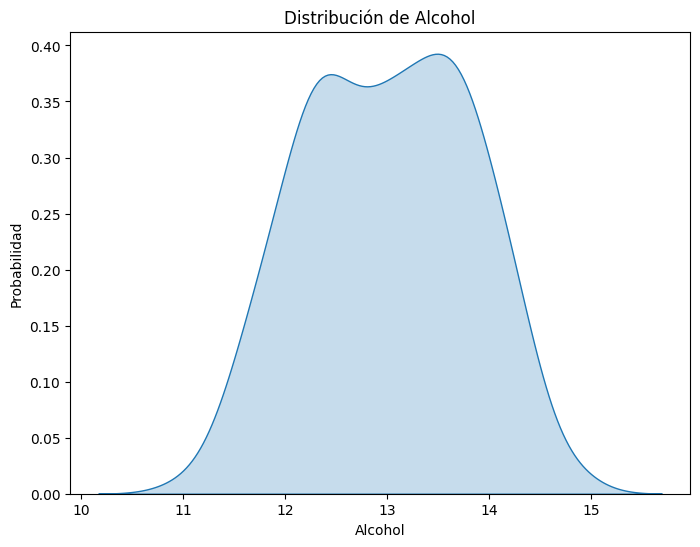

---Prueba de Normalidad---
Estadístico de prueba: 0.9818
P-Value: 0.020047981728854945


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable alcohol original
plt.figure(figsize =  (8, 6))
sns.kdeplot(alcohol, fill =  True)
plt.title("Distribución de Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Probabilidad")
plt.show()

# Prueba de normalidad para la variable Alcohol
from scipy.stats import shapiro

stat, p_value =  shapiro(alcohol)

print("---Prueba de Normalidad---")
print(f"Estadístico de prueba: {stat:.4f}")
print(f"P-Value: {p_value}")


A primera vista, la variable alcohol parece distribuirse bimodalmente. Es posible observar 2 picos alrededor de 12.5 y 13.5, aproxidamente. Por otra parte,  el valor p de la prueba Shapiro-Wilk sugiere que hay evidencia suficiente para rechazar la hipótesis nula de normalidad, por lo tanto, concluimos que la variable alcohol no se distribuye normalmente.

## 4.	Aplicar la normalización Min-Max a los datos seleccionados.

In [104]:
from sklearn.preprocessing import MinMaxScaler

# Creación de una instancia del escalador
scaler  =  MinMaxScaler()

# Normalización de datos
alcohol_normalizado_min_max =  scaler.fit_transform(alcohol.values.reshape(-1, 1))

# Impresión de variable normalizada
alcohol_normalizado_min_max[:5]


array([[0.84210526],
       [0.57105263],
       [0.56052632],
       [0.87894737],
       [0.58157895]])

La normalización Min-Mix consiste en restar el valor mínimo del conjuto de datos a cada observación divido entre la diferencia entre el valor máximo y mínimo del conjunto de datos. Es decir:

$$x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$$

Esto da como resultado, que los datos sean rescalados entre 0 y 1. Como se muestra a continuación.


In [105]:
print(f"Valor mínimo: {alcohol_normalizado_min_max.min()}")
print(f"Valor máximo: {alcohol_normalizado_min_max.max()}")

Valor mínimo: 0.0
Valor máximo: 1.0


##5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.

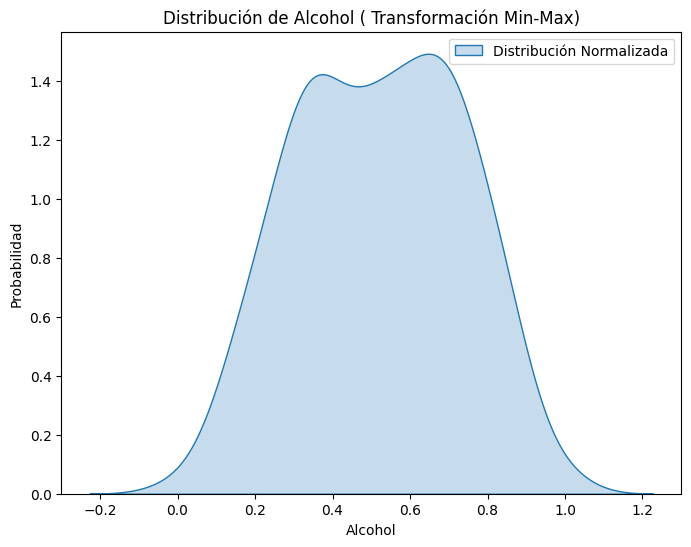

---Prueba de Normalidad Variable Transformada---
Estadístico de prueba: 0.9818
P-Value: 0.020047981728854858


In [107]:
plt.figure(figsize =  (8, 6))
sns.kdeplot(alcohol_normalizado_min_max, fill =  True)
plt.title("Distribución de Alcohol ( Transformación Min-Max)")
plt.xlabel("Alcohol")
plt.ylabel("Probabilidad")
plt.legend(["Distribución Normalizada"])
plt.show()


stat, p_value  =  shapiro(alcohol_normalizado_min_max)
print("---Prueba de Normalidad Variable Transformada---")
print(f"Estadístico de prueba: {stat:.4f}")
print(f"P-Value: {p_value}")

Como podemos observar, los valores transformados solo cambiaron de escalar (entre 0 y 1), sin embargo, la distribución de los datos parece inalterada después de aplicar transformación Min-Max. Adicionalmente, el valor p de la prueba Shapiro-Wilk sigue sugiriendo que  hay evidencia suficiente para rechazar la hipótesis nula de normalidad, por lo tanto, concluimos que la variable alcohol no se distribuye normalmente a pesar de la transformación.

## Gráficar los datos originales y los normalizados utilizando matplotlib o seaborn

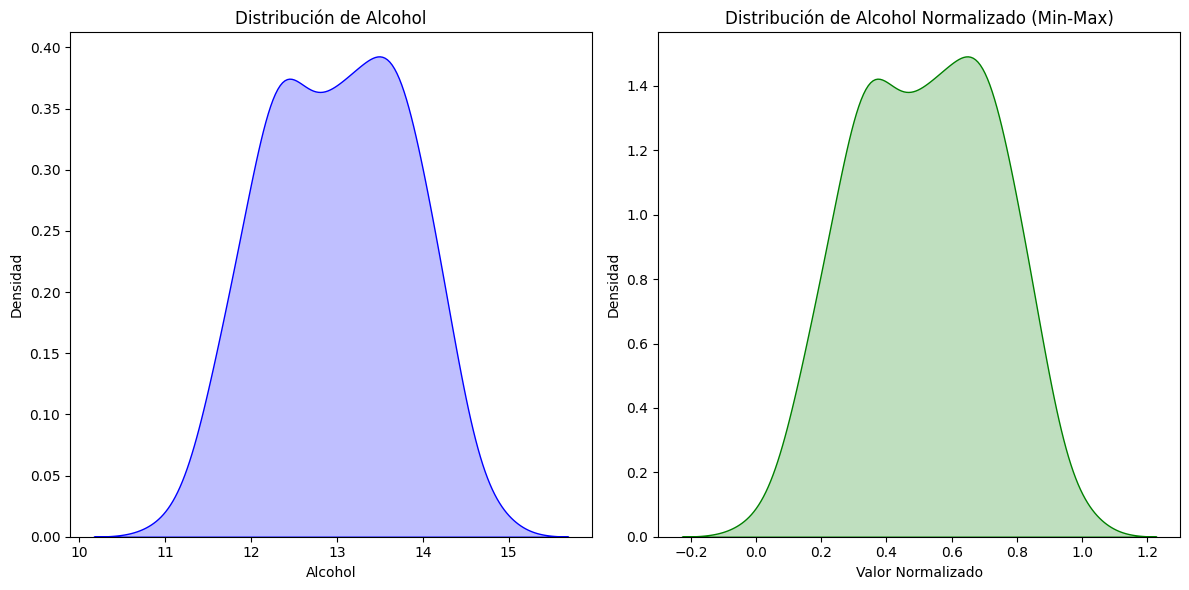

In [110]:
fig, ax =  plt.subplots(1, 2, figsize =  (12, 6))

# Distribución de Datos Originales
sns.kdeplot(x=alcohol, fill=True, color="blue", ax=ax[0])
ax[0].set_title("Distribución de Alcohol")
ax[0].set_xlabel("Alcohol")
ax[0].set_ylabel("Densidad")

# Distribución de Datos Transformados
sns.kdeplot(x=alcohol_normalizado_min_max.flatten(), fill=True, color="green", ax=ax[1])
ax[1].set_title("Distribución de Alcohol Normalizado (Min-Max)")
ax[1].set_xlabel("Valor Normalizado")
ax[1].set_ylabel("Densidad")

plt.tight_layout()
plt.show()

##7.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?

La normalización Min-Max solo afectó la escala de los valores, sin embargo, no cambio la distribución de los datos.

2. ¿Qué interpretas del p-valor antes y después de la normalización?

El valor p sigue siendo menor al 2%. Por lo tanto, a un nivel de significancia del 5% seguimos rechazando la hipótesis nula de que los datos se distribuyen normalmente (antes y después de la transformación).


# Ejercicio 2: Normalización Z-Score

##1.	Cargar el dataset wine de sklearn.

In [111]:
import pandas as pd
from sklearn.datasets import load_wine

# Cargar el conjunto de datos
wine  =  load_wine()
df_wine = pd.DataFrame(data =  wine.data, columns =  wine.feature_names)

# Agregar variable target
df_wine['target'] =  wine.target
df_wine["target"] =  df_wine["target"].astype("category")

##2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).

In [112]:
# Selección de la columna Alcohol
malic_acid  =  df_wine['malic_acid']
malic_acid.head()

,malic_acid
0,1.71
1,1.78
2,2.36
3,1.95
4,2.59


##3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.

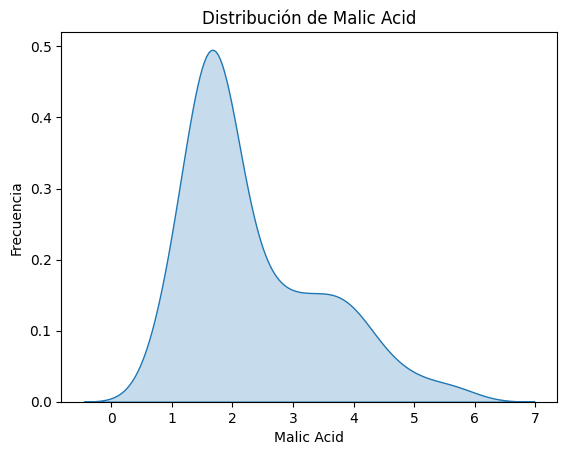

---Prueba de Normalidad Datos Originales---
Estadístico de prueba: 0.8888
P-Value: 2.945800703600761e-10


In [114]:
# Histograma de Malic Acid
import matplotlib.pyplot as plt
sns.kdeplot(malic_acid, fill =  True)
plt.title("Distribución de Malic Acid")
plt.xlabel("Malic Acid")
plt.ylabel("Frecuencia")
plt.show()

stat, p_value =  shapiro(malic_acid)

print("---Prueba de Normalidad Datos Originales---")
print(f"Estadístico de prueba: {stat:.4f}")
print(f"P-Value: {p_value}")

Como podemos observar la variable Malic Acid parece no distribuirse normalmente. Se podría argumentar que la distribución tiene 2 modas alrededor de 1.5 y 3.5 aproximadamente. En general la variable exhibe un sesgo positivo representando en la cola larga hacia la derecha.

##4.	Aplicar la normalización Z-Score a los datos seleccionados.


In [50]:
from sklearn.preprocessing import StandardScaler

# Creación de instancia del scalador
scaler  =  StandardScaler()

# Normalización Z-Score Malic Acid
malic_acid_normalizado_z_score =  scaler.fit_transform(malic_acid.values.reshape(-1, 1))
malic_acid_normalizado_z_score[:5]

array([[-0.5622498 ],
       [-0.49941338],
       [ 0.02123125],
       [-0.34681064],
       [ 0.22769377]])

La normalización z-Score consiste en restar el promedio del conjuto de datos a cada observación divido entre la desviación estándar del conjunto de datos. Es decir:

$$
z = \frac{x - \mu}{\sigma}
$$

Esto da como resultado, que los datos con media 0 y varianza 1 como se muestra a continuación.

In [118]:
print(f"Media: {abs(malic_acid_normalizado_z_score.mean().round(0))}")
print(f"Varianza: {malic_acid_normalizado_z_score.var().round(0)}")

Media: 0.0
Varianza: 1.0


## 5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.

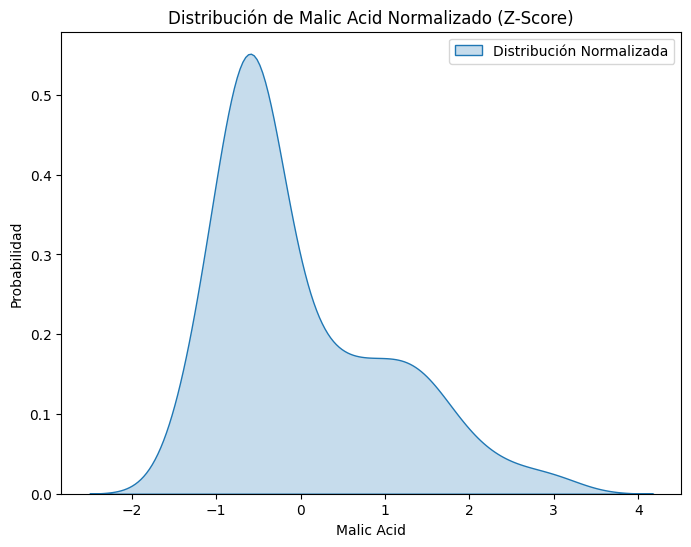

---Prueba de Normalidad Variable Transformada (Z-Score)---
Estadístico de prueba: 0.9818
P-Value: 0.020047981728854858


In [119]:
plt.figure(figsize =  (8, 6))
sns.kdeplot(malic_acid_normalizado_z_score, fill =  True)
plt.title("Distribución de Malic Acid Normalizado (Z-Score)")
plt.xlabel("Malic Acid")
plt.ylabel("Probabilidad")
plt.legend(["Distribución Normalizada"])
plt.show()


stat, p_value  =  shapiro(alcohol_normalizado_min_max)
print("---Prueba de Normalidad Variable Transformada (Z-Score)---")
print(f"Estadístico de prueba: {stat:.4f}")
print(f"P-Value: {p_value}")




Como podemos observar, la transformación solo cambió la escala de los valores. La nueva variable transformada parece estar centrada alrededor de 0. Sin embargo, el valor p de la prueba Shapiro-Wilk sigue sugiriendo que hay evidencia suficiente para rechazar la hipótesis nula de normalidad, por lo tanto, concluimos que la variable Malic Acid no se distribuye normalmente a pesar de la transformación Z-Score

##6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.

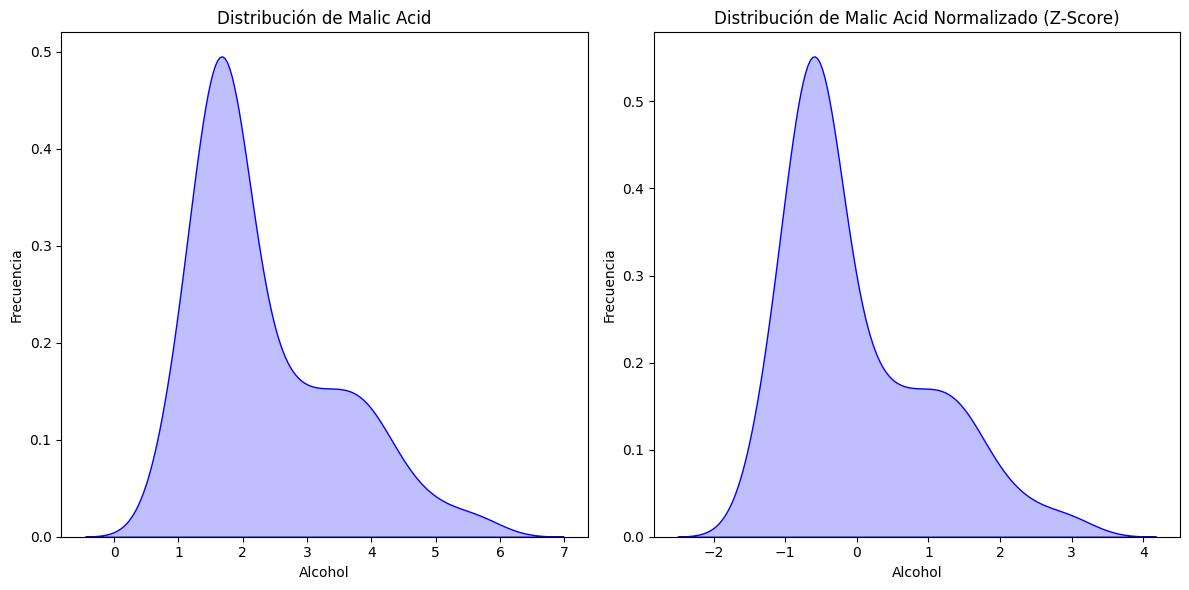

In [120]:
fig, ax =  plt.subplots(1, 2, figsize =  (12, 6))

# Distribución de Datos Originales
sns.kdeplot(x=malic_acid, fill=True, color="blue", ax=ax[0])
ax[0].set_title("Distribución de Malic Acid")
ax[0].set_xlabel("Alcohol")
ax[0].set_ylabel("Frecuencia")


# Distribución de Datos Transformados
sns.kdeplot(x=malic_acid_normalizado_z_score.flatten(), fill=True, color="blue", ax=ax[1])
ax[1].set_title("Distribución de Malic Acid Normalizado (Z-Score)")
ax[1].set_xlabel("Alcohol")
ax[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Ejercicio 2: Normalización Z-Score

Instrucciones:





7.	Responder las preguntas siguientes.

1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?

La transformación Z-Score únicamente cambio la escala de los valores, sin embargo, el P de la prueba Shapiro-Wilk sugiere que la variable Malic Acid no se distribuye normalmente (antes y después de la transformación).

2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?

La transformación Z-Score  es útil para cuando queremos comparar valores en distintas escalas.  Sin embargo, no altera la distribución de los datos. Otro punto interesentate, es que puede ayudar a paliar el problema de valores atípicos, sin embargo, considero que dificulta la interpretación de los datos al estar normalizados.



# Ejercicio 3: Transformación Logaritmica

##1.	Cargar un conjunto de datos aleatorios generados con numpy.

In [76]:
import numpy as np

np.random.seed(5)
datos_aleatorios  =  np.random.rand(1000)
datos_aleatorios[:5]

array([0.22199317, 0.87073231, 0.20671916, 0.91861091, 0.48841119])

##2.	Aplicar una transformación logarítmica (np.log) a los datos.

In [77]:
datos_aleatorios_logaritmicos  =  np.log(datos_aleatorios)
datos_aleatorios_logaritmicos[:5]

array([-1.50510866, -0.13842069, -1.57639414, -0.08489263, -0.71659763])

##3.	Realizar una prueba de normalidad sobre los datos originales y transformados.

In [78]:
stat, p_value  =  shapiro(datos_aleatorios)
print("---Prueba de Normalidad Datos Aleatorios Originales---")
print(f"Estadístico de prueba: {stat:.4f}")
print(f"P-Value: {p_value}\n")


stat, p_value  =  shapiro(datos_aleatorios_logaritmicos)
print("---Prueba de Normalidad Datos Transformados (Logaritmicos)---")
print(f"Estadístico de prueba: {stat:.4f}")
print(f"P-Value: {p_value}")

---Prueba de Normalidad Datos Aleatorios Originales---
Estadístico de prueba: 0.9571
P-Value: 1.5852718079797402e-16

---Prueba de Normalidad Datos Transformados (Logaritmicos)---
Estadístico de prueba: 0.7937
P-Value: 9.06299581582221e-34


##4.	Graficar los datos originales y transformados utilizando matplotlib.

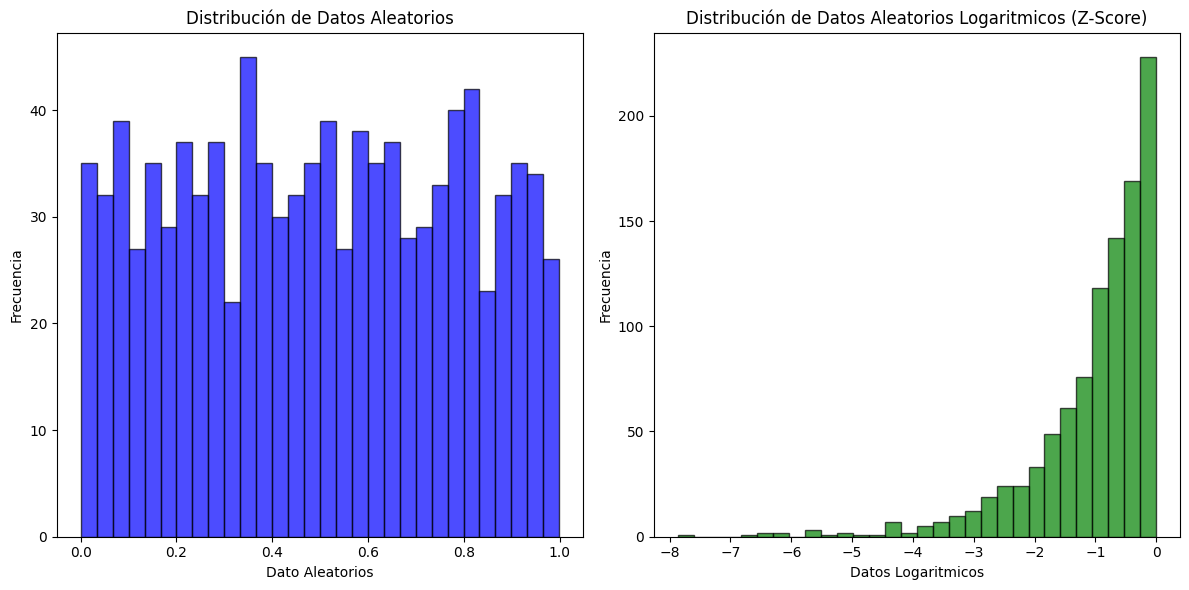

In [79]:
fig, ax =  plt.subplots(1, 2, figsize =  (12, 6))

# Distribución de Datos Originales
ax[0].hist(datos_aleatorios, bins  =  30, color  = "blue", alpha  = 0.7, edgecolor  = "black")
ax[0].set_title("Distribución de Datos Aleatorios")
ax[0].set_xlabel("Dato Aleatorios")
ax[0].set_ylabel("Frecuencia")


# Distribución de Datos Transformados
ax[1].hist(datos_aleatorios_logaritmicos, bins  =  30, color  = "green", alpha  = 0.7, edgecolor  = "black")
ax[1].set_title("Distribución de Datos Aleatorios Logaritmicos (Z-Score)")
ax[1].set_xlabel("Datos Logaritmicos")
ax[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Ejercicio 3: Transformación Logarítmica
Instrucciones:




5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?
2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?


# Ejercicio 4: Transformación Raíz Cuadrada

##1.	Cargar un conjunto de datos aleatorios generados con numpy.

In [74]:
import numpy as np

np.random.seed(10)
datos_aleatorios  =  np.random.rand(5000)
datos_aleatorios[:5]

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701])

##2.	Aplicar una transformación de raíz cuadrada a los datos.

In [75]:
datos_aleatorios_raiz_cuadrada =  np.sqrt(datos_aleatorios)
datos_aleatorios_raiz_cuadrada[:5]

array([0.87824862, 0.14405537, 0.79602025, 0.86533455, 0.70605029])

##3.	Realizar una prueba de normalidad sobre los datos originales y transformados.

In [80]:
stat, p_value  =  shapiro(datos_aleatorios)
print("---Prueba de Normalidad Datos Aleatorios Originales---")
print(f"Estadístico de prueba: {stat:.4f}")
print(f"P-Value: {p_value}\n")


stat, p_value  =  shapiro(datos_aleatorios_raiz_cuadrada)
print("---Prueba de Normalidad Datos Transformados (Raíz Cuadrada)---")
print(f"Estadístico de prueba: {stat:.4f}")
print(f"P-Value: {p_value}")


---Prueba de Normalidad Datos Aleatorios Originales---
Estadístico de prueba: 0.9571
P-Value: 1.5852718079797402e-16

---Prueba de Normalidad Datos Transformados (Raíz Cuadrada)---
Estadístico de prueba: 0.9482
P-Value: 8.74878965301378e-39


## 4.	Graficar los datos originales y transformados utilizando matplotlib.

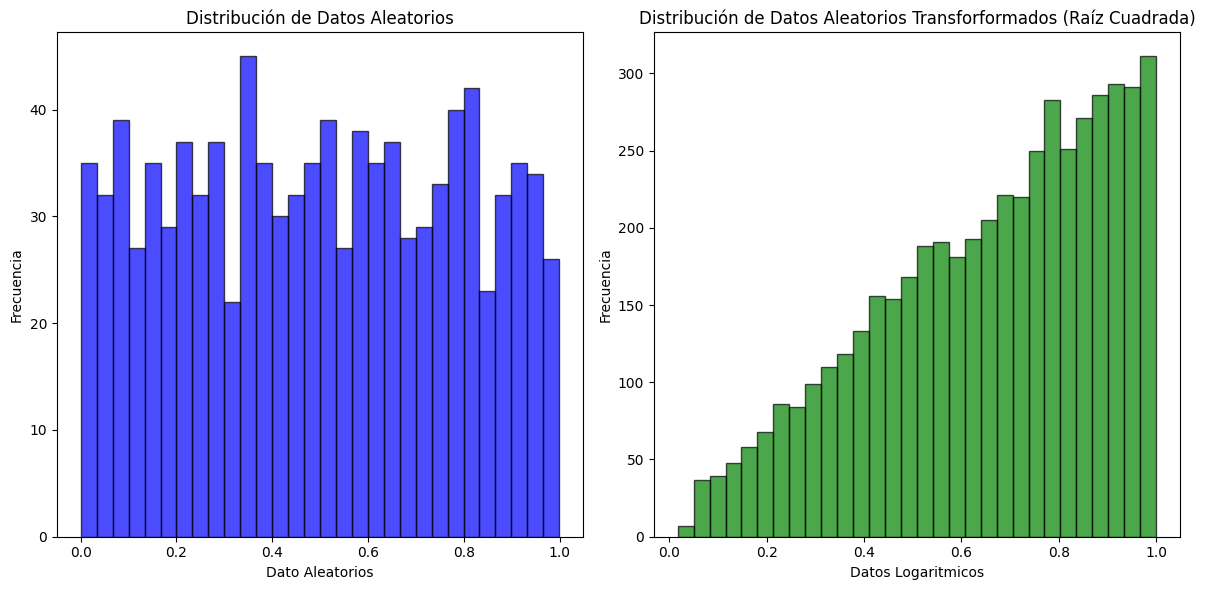

In [81]:
fig, ax =  plt.subplots(1, 2, figsize =  (12, 6))

# Distribución de Datos Originales
ax[0].hist(datos_aleatorios, bins  =  30, color  = "blue", alpha  = 0.7, edgecolor  = "black")
ax[0].set_title("Distribución de Datos Aleatorios")
ax[0].set_xlabel("Dato Aleatorios")
ax[0].set_ylabel("Frecuencia")


# Distribución de Datos Transformados
ax[1].hist(datos_aleatorios_raiz_cuadrada, bins  =  30, color  = "green", alpha  = 0.7, edgecolor  = "black")
ax[1].set_title("Distribución de Datos Aleatorios Transforformados (Raíz Cuadrada)")
ax[1].set_xlabel("Datos Logaritmicos")
ax[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Ejercicio 4: Transformación Raíz Cuadrada
Instrucciones:




5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?
2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?


# Ejercicio 5: Transformación Box-Cox

##1.	Cargar un conjunto de datos aleatorios generados con numpy.

In [82]:
import numpy as np

np.random.seed(10)
datos_aleatorios  =  np.random.rand(5000)
datos_aleatorios[:5]

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701])

##2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.

In [86]:
from scipy.stats import boxcox

datos_aleatorios_box_cox, lambda_ =  boxcox(datos_aleatorios)
datos_aleatorios_box_cox[:5]

array([-0.23790093, -1.35878506, -0.39192992, -0.26245742, -0.55385514])

In [88]:
print(f"Mejor Lambda:",  {lambda_})

Mejor Lambda: {np.float64(0.6839821984673761)}


##3.	Realizar una prueba de normalidad sobre los datos originales y transformados.


In [84]:
stat, p_value  =  shapiro(datos_aleatorios)
print("---Prueba de Normalidad Datos Aleatorios Originales---")
print(f"Estadístico de prueba: {stat:.4f}")
print(f"P-Value: {p_value}\n")


stat, p_value  =  shapiro(datos_aleatorios_box_cox)
print("---Prueba de Normalidad Datos Transformados (Box-Cox)---")
print(f"Estadístico de prueba: {stat:.4f}")
print(f"P-Value: {p_value}")

---Prueba de Normalidad Datos Aleatorios Originales---
Estadístico de prueba: 0.9537
P-Value: 3.764400654386816e-37

---Prueba de Normalidad Datos Transformados (Box-Cox)---
Estadístico de prueba: 0.9572
P-Value: 5.227704174961686e-36


## 4.	Graficar los datos originales y transformados utilizando matplotlib.

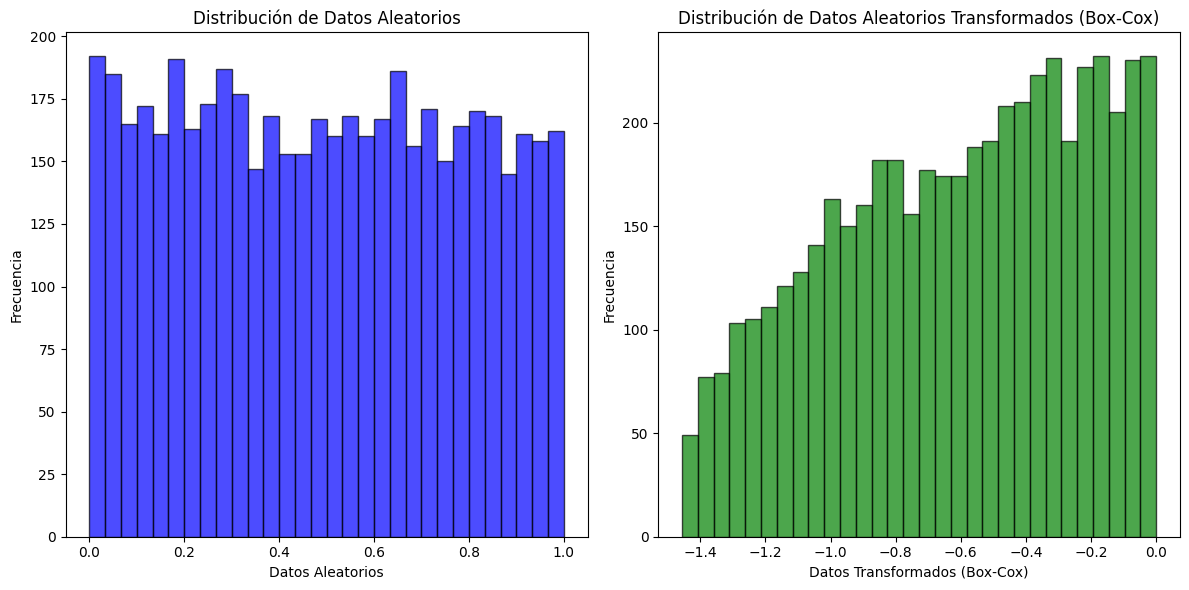

In [85]:
fig, ax =  plt.subplots(1, 2, figsize =  (12, 6))

# Distribución de Datos Originales
ax[0].hist(datos_aleatorios, bins  =  30, color  = "blue", alpha =  0.7, edgecolor  = "black")
ax[0].set_title("Distribución de Datos Aleatorios")
ax[0].set_xlabel("Datos Aleatorios")
ax[0].set_ylabel("Frecuencia")

# Distribución de Datos Transformados (BoxCox)
ax[1].hist(datos_aleatorios_box_cox, bins  =  30, color  =  "green", alpha  =  0.7, edgecolor  = "black")
ax[1].set_title("Distribución de Datos Aleatorios Transformados (Box-Cox)")
ax[1].set_xlabel("Datos Transformados (Box-Cox)")
ax[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [ ]:
fig, ax =  plt.subplots(1, 2, figsize =  (12, 6))

# Distribución de Datos Originales
ax[0].hist(datos_aleatorios, bins  =  30, color  = "blue", alpha  = 0.7, edgecolor  = "black")
ax[0].set_title("Distribución de Datos Aleatorios")
ax[0].set_xlabel("Dato Aleatorios")
ax[0].set_ylabel("Frecuencia")


# Distribución de Datos Transformados
ax[1].hist(datos_aleatorios_raiz_cuadrada, bins  =  30, color  = "green", alpha  = 0.7, edgecolor  = "black")
ax[1].set_title("Distribución de Datos Aleatorios Transforformados (Raíz Cuadrada)")
ax[1].set_xlabel("Datos Logaritmicos")
ax[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Ejercicio 5: Transformación Box-Cox
Instrucciones:




5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?
